TODO: print the version of ALL the libraries I will be using in this study

<!-- FIRST TITLE -->
<!-- # Preservation of Semantics Through Various Text Vectorization Methods on a Movie Dialouge Corpus: A Statistical Comparison -->

<!-- SECOND TITLE -->
<!-- # Output Of Different Semantic Text Vectorization Methods: A Statistical Comparison -->

<!-- THIRD TITLE -->
<!-- # Principle Component Analysis on The Output of Different Semantic Text Vectorization Methods: A Statistical Study -->

<!-- FIRST CHATGPT TITLE -->
# Quantifying Information Retention in Matrix Reconstruction: A Comparative Analysis of Semantic Vectorization Methods Using PCA
TODO: this block is essentially the title page of the study paper, hence I need to add stuf here that is usually found on the title page of a study paper

## Abstract
TODO: add an abstract

## Goal
The goal of this research is to evaluate and compare the effectiveness of different semantic vectorization methods in retaining information during matrix reconstruction, by analyzing the number of Principal Component Analysis (PCA) components required to preserve at least 80% of the original information across various vectorization approaches.

The semantic vectorization methods will be determined later in this document and will be treated as black boxes for the purpose of this study. The focus will be on the effectiveness of these methods in retaining information during matrix reconstruction, rather than the specifics of the vectorization techniques themselves.

## Type of study
TODO: add the fact that this study uses statistical methods to compare different text vectorization methods outcomes, I.E. statistical comparison of (sparse?) matrices

## Research questions

TODO: add the research questions
<!-- 
Main research question:
- 
 -->

<!-- FEEDBACK FROM TEACHER: be wary of the fact that you dont change your hypothesis midway trough your study based on findings -->
## Hypotheses

The following hypotheses are tested in this research:
<!-- 1. All the different text vectorization methods will produce a sparse matrix as output. -->
<!-- QUESTION FOR TEACHER: this isnt really a statistical question is it? depending on how a sparse matrix is defined and how you detirmine this, this either is or isnt a question of statistics -->
<!-- FEEDBACK: do you need to see this as a sparse matrix, or can you just view it as a matrix -->

<!-- 1. The resulting matrixes from different text vectorization methods are statistically different. -->
<!-- QUESTION FOR TEACHER: this seems like a proper null hypotheses I can test using statistical methods, like comparing disrtibutions on a corpus entry level -->
<!-- FEEDBACK: its a bit to vague, lets brainstorm some ideas for a hypotheses together -->

<!-- Brainstorm for hypotheses:
Hoeveel informatie zit er in de matrix? In andere woorden:
- Ik heb 100 cooficienten (losse vector waardes), hoeveel cooficienten heb ik nodig om de matrix terug te construeren zonder informatie te verliezen?
    - Voor iedere vectorizatie methode, hoeveel PCA componenten heb ik nodig om minimaal 80% van de informatie te behouden?
    - Welke van de vectorisatie methodes heeft het minsten componenten nodig?
- Is de ene matrix meer sparser dan de ander?
-->
How much information is in the matrix? In other words:
- I have 100 cooficients (single vector values), how many cooficients do I need to construct the matrix back without losing information?
    - For each vectorization method, how many PCA components do I need to retain at least 80% of the information?
    - Which of the vectorization methods needs the fewest components?
- Is one matrix more sparser than the other?

## Text vectorization methods

TODO: describe the text vectorization methods I will be using in this study, which are:
- Word2Vec
- CBOW (Continuous Bag of Words)
- GloVe
- FastText

### Implementation providers

TODO: describe in markdown codeblocks, using pip install commands, which implementation provider we will be using.
For example: Word2Vec implementation is provided by gensim

### Implementation Details
TODO: describe that we need to look into a couple of implementation details, including but not limited to:
- whether the vectorization method expects a certain level of preprocessing or wheter it does that internally
- we also need to think about the impect that preprocessing might have on the output of each method
    - I would expect a matrix output from a word-tokenized corpus to be bigger then a sentence-tokenized corpus

| Method   | Preprocesses internally? | Expects ... tokens |
|----------|--------------------------|--------------------|
| Word2Vec | Yes/No                   | word/sentence      |
| CBOW     | Yes/No                   | word/sentence      |
| GloVe    | Yes/No                   | word/sentence      |
| FastText | Yes/No                   | word/sentence      |

TODO: discuss with teacher whether I should include the preprocessing in the vectorization method or just presume this as being part of the black box (i.e. the vectorization method)

## Data gathering

For my corpus I will be using a [dataset consisting of conversational movie dialouge](https://convokit.cornell.edu/documentation/movie.html).
My choice for this dataset is mostly cause of convenience sakes ... TODO: expand on this

In [1]:
import os.path

study_data_dir = os.path.abspath("./data") # We use absolute path to avoid any potential path issues

# Create data folder if it does not exist
if not os.path.exists(study_data_dir):
    print("Creating data folder")
    os.makedirs(study_data_dir)
else:
    print("Data folder already exists")

Data folder already exists


In [2]:
from convokit import Corpus, download

corpus_name = "movie-corpus"
corpus_fpath = study_data_dir + os.path.sep + corpus_name + ".zip"

# Download the corpus if it doesn't exist
if not os.path.exists(corpus_fpath):
    print("Downloading corpus...")
    corpus = Corpus(filename=download(corpus_name, data_dir=study_data_dir))
else:
    print("Corpus already downloaded.")
    corpus_dir = study_data_dir + os.path.sep + corpus_name + os.path.sep
    corpus = Corpus(filename=corpus_dir) 
    # the file parameter can be quite confusing, as it actually expects the unziped corpus as a directory

print("Corpus is loaded!")

Corpus already downloaded.
Corpus is loaded!


In [3]:
corpus.print_summary_stats()
# Number of Speakers: 9035
# Number of Utterances: 304713
# Number of Conversations: 83097

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


We will be using the `corpus.iter_utterances()` method to generate a list of strings, which will be used as the input for the different text vectorization methods.

In [4]:
corpus_texts = [utt.text for utt in corpus.iter_utterances()]
corpus_texts[:10]

['They do not!',
 'They do to!',
 'I hope so.',
 'She okay?',
 "Let's go.",
 'Wow',
 "Okay -- you're gonna need to learn how to lie.",
 'No',
 'I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'Like my fear of wearing pastels?']

### Discriptive Statistics

TODO: add that we will explore the corpus using discriptive statistics to get a better understanding of the data

In [5]:
print(f"Their are {len(corpus_texts)} utterances in the corpus")
# expected to be the same as in the `corpus.print_summary_stats()` output, i.e. 304713

Their are 304713 utterances in the corpus


In [6]:
# shortest and longest utterances
shortest_utt = min(corpus_texts, key=len)
print("Shortest Utterance: ", shortest_utt, f"\n\t(len of {len(shortest_utt)})")

longest_utt = max(corpus_texts, key=len)
print("Longest Utterance: ", longest_utt, f"\n\t(len of {len(longest_utt)})")

Shortest Utterance:   
	(len of 0)
Longest Utterance:  Then let's begin with the story itself. It's a story of the Grail myth...And although there are several variations, my favorite begins with the Fisher King as a young boy... who had to spend a night alone in the forest to prove his courage... and during that night, he is visited by a sacred vision. Out of the fire, appears the Holy Grail - God's highest symbol of divine grace. And a voice says to the boy, "You shall be the guardian of the Grail, that it may heal the hearts of men"...But the boy was overcome ...Innocent and foolish, he was blinded by greater visions - a life ahead filled with beauty and glory, hope and power...Tears filled his eyes as he sensed his own... invincibility. A boy's tears of naive wonder and inspiration. and in this state of...radical amazement...he felt for a brief moment, not like a boy, but like God...  ...And so he reached into the fire to take the Grail. And the Grail vanished. And the boy hands wer

In [7]:
# number of empty utterance's
empty_utterances = [ i for i in corpus_texts if len(i) == 0 ]
print(f"Number of empty utterance's: {len(empty_utterances)}")

Number of empty utterance's: 267


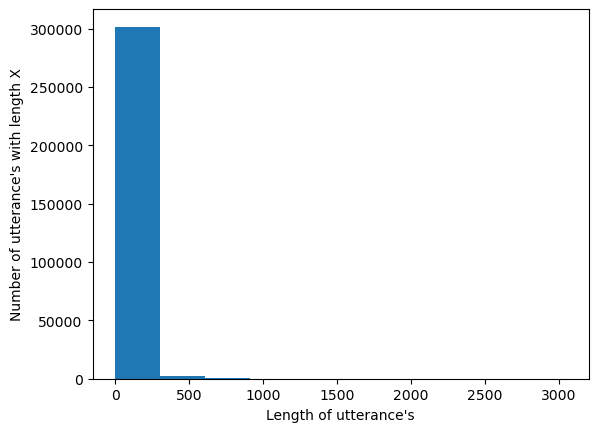

In [8]:
# plot a histogram of the length of all the utterance's
import matplotlib.pyplot as plt

plt.hist([len(i) for i in corpus_texts])
plt.xlabel("Length of utterance's")
plt.ylabel("Number of utterance's with length X")
plt.show()

### Preprocessing

TODO: describe that minimal preprocessing will be done on the data, as the focus is on the vectorization methods and not the data itself. this is to keep this study as simple as possible.
Bellow is a list of steps I will be applying during preprocessing:
- Remove any empty strings 
- Transform all text to be lower case
- Remove JSON string scape sequences (i.e. forward slash followed by apostrafie, \')
- 

## Vecotrizing the corpus using the chosen vectorization methods

TODO: describe that we will now vecotirze the corpus using the vectorization methods chosen earlier.

### Base class for text vectorization methods

The code block below shows a base class that will be used to interface with the text vectorization methods. This class will be extended for each of the text vectorization methods mentioned above. This is purly for orginization purposes and to make the code more readable.

In [9]:
import numpy as np
from collections.abc import Iterable

class TextVectorizationMethod:
    def __init__(self, method: str):
        self.method = method

    def fit(self, corpus: Iterable):
        raise NotImplementedError

    def generate_matrix(self) -> np.ndarray:
        raise NotImplementedError

### Word2Vec

In [10]:
from gensim.models import Word2Vec

class Word2VecVectorization(TextVectorizationMethod):
    def __init__(self):
        super().__init__(method='word2vec')
        self.model = None

    def fit(self, corpus: list[str]):
        # Train the Word2Vec model
        self.model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

    def generate_matrix(self) -> np.ndarray:
        if self.model is None:
            raise ValueError("Model has not been trained. Call fit() first.")
        # Generate the matrix
        matrix = np.array([self.model.wv[word] for word in self.model.wv.index_to_key])
        return matrix

In [11]:
# Example usage
word2vec_vectorization = Word2VecVectorization()
word2vec_vectorization.fit(corpus_texts)
matrix = word2vec_vectorization.generate_matrix()
print(matrix.shape)

(93, 100)


TODO: describe that I will first generate the matrixes using these methods and store those in seperate files, in order to make this study reproducable

### CBOW (Continuous Bag of Words)

In [12]:
# TODO: choose implementation for the CBOW model

### GloVe

In [13]:
# TODO: choose implementation for the GloVe model

### FastText

In [14]:
# TODO: choose implementation for the FastText model

## Sources
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

```BibTex
@InProceedings{Danescu-Niculescu-Mizil+Lee:11a,
    author={Cristian Danescu-Niculescu-Mizil and Lillian Lee},
    title={Chameleons in imagined conversations:
        A new approach to understanding coordination of linguistic style in dialogs.},
    booktitle={Proceedings of the, Workshop on Cognitive Modeling and Computational Linguistics, ACL 2011},
    year={2011},
    url={https://www.cs.cornell.edu/~cristian/Chameleons_in_imagined_conversations.html}
}
```